# Graph Mining

## 📚 Exercise 1
Complete the function `compute_modularity` to compute the modularity measure of a given graph.

### Goal:
1. Visualizing two graphs using `networkx` (the Karate Club graph is currently commented out in the code)
2. Completing `compute_modularity` function that aims to measure modularity of a given graph

### What you are learning in this exercise:
1. Getting familiar with `networkx` library.
2. Analyzing modularity measure for different graph inputs

#### Hint: you can install `networkx` package by running the following command in a  notebook cell: `!conda install networkx --yes `

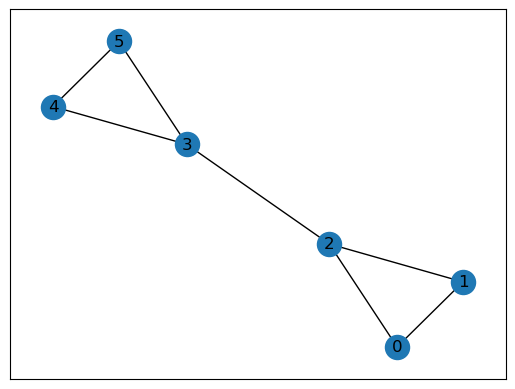

In [25]:
import networkx as nx
import numpy as np
%matplotlib inline

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)

#G = nx.karate_club_graph()
#nx.draw_networkx(G)

In [26]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1

In [27]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5))

In [28]:
# The community label of a node can be accessed by G[node_id]['community']
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G: nx.Graph) -> float:
    """Compute the modularity of a graph
    
    Args:
        * G (nx.Graph): the graph to analyze
        
    Returns:
        * float: the modularity of the graph
    """
    m = len(G.edges)
    Q = 0
    # your code here
    for i in range(m-1):
        for j in range(m-1):
            A_ij = G.number_of_edges(i,j)
            k_i = G.degree[i]
            k_j = G.degree[j]
            if G.nodes[i]['community'] == G.nodes[j]['community']:
                Q += (A_ij - (k_i * k_j) / (2*m))
    return Q/(2*m)

In [29]:
compute_modularity(G)

0.3571428571428571

## 📚 Exercise 2
Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.